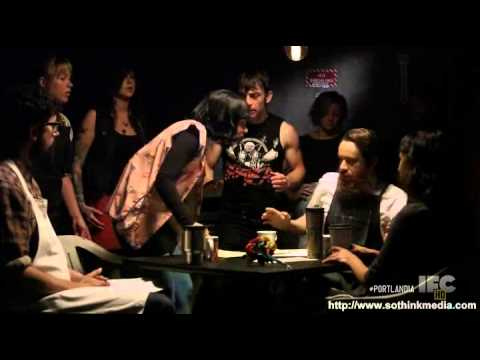

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\shima\\Documents\\unit4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer
import squarify

In [2]:
# create a fuction which takes a corpus of document and returns and dataframe of word counts for us to analyze.
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [3]:
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

# Load the pre-trained statistical model for English
import en_core_web_lg
nlp = en_core_web_lg.load()

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [4]:
# creates stop words
STOPWORDS = nlp.Defaults.stop_words

In [15]:
# creates a function for removing stop words
def rm_stopwords(tkns):
    '''
    a function for removing stop words from a list of tokens
    '''
    tok_list = []
    for tok in tkns:
        if str(tok) not in STOPWORDS.union(' '):
            tok_list.append(tok)
            
    return(tok_list)

In [16]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [17]:
# copies dataframe to new df
df = shops.copy()

In [18]:
# renames columns for ease of use later
df.columns=['shop', 'text', 'rating']

In [19]:
# changes rating column to have only the number (still as a string)
df['rating'] = df['rating'].str[1:4]

In [20]:
# converts number string to float, then float to int
df['rating'] = df['rating'].astype(float)
df['rating'] = df['rating'].astype(int)

In [21]:
# creates a date column
df['date'] = df['text'].str.split(' ').apply(lambda x: x[1])

In [22]:
# converts data column to datetime dtype
df['date'] = df['date'].apply(pd.to_datetime)

In [23]:
# removes punctuation with regex given in lecture
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z ^0-9]', '', x))

In [24]:
# changes text to be lowercase
df['text'] = df['text'].apply(lambda x: x.lower())

In [25]:
# creates a new column with tokenized data using lecture function
df['tokens'] = df['text'].apply(tokenizer)

# takes every token past the date token
df['tokens'] = df['tokens'].apply(lambda x: x[2:])

df['tokens'] = df['tokens'].apply(lambda x: rm_stopwords(x))

# converts tokens to list of lemmas
df['tokens'] = df['tokens'].apply(lambda x: 
                [token.lemma_ for token in x])

# creates a counter for the tokens
df['counter'] = df['tokens'].apply(Counter)

In [26]:
df.head()

,shop,text,rating,date,tokens,counter
0,The Factory - Cafe With a Soul,11252016 1 checkin love love loved the atmosp...,5,2016-11-25,"[1, checkin, love, love, love, atmosphere, cor...","{'1': 1, 'checkin': 1, 'love': 3, 'atmosphere'..."
1,The Factory - Cafe With a Soul,1222016 listed in date night austin ambiance ...,4,2016-12-02,"[list, date, night, austin, ambiance, austin, ...","{'list': 1, 'date': 1, 'night': 1, 'austin': 2..."
2,The Factory - Cafe With a Soul,11302016 1 checkin listed in brunch spots i l...,4,2016-11-30,"[1, checkin, list, brunch, spot, love, eclecti...","{'1': 1, 'checkin': 1, 'list': 1, 'brunch': 2,..."
3,The Factory - Cafe With a Soul,11252016 very cool decor good drinks nice sea...,2,2016-11-25,"[cool, decor, good, drink, nice, seat, overpri...","{'cool': 1, 'decor': 1, 'good': 1, 'drink': 1,..."
4,The Factory - Cafe With a Soul,1232016 1 checkin they are located within the...,4,2016-12-03,"[1, checkin, locate, northcross, mall, shop, c...","{'1': 1, 'checkin': 1, 'locate': 1, 'northcros..."


In [27]:
# sums the rows into one counter
wordCount = df['counter'].sum()

In [28]:
# creates dataframes for good and bad ratings
dfGood = df[df['rating'] > 3]
dfBad = df[df['rating'] < 4]

# makes sure the size of the new dataframes add up to the size of the original dataframe
assert len(df) == len(dfGood) + len(dfBad)

In [29]:
# creates counters for good/bad reivews
wordCountGood = dfGood['counter'].sum()
wordCountBad = dfBad['counter'].sum()

In [30]:
# looks at top 10 words from all reviews using lecture function
# drops empty word
wordsDF = count(df['counter'])
wordsDF.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
17,coffee,4924,10593,1.0,0.028664,0.028664,0.646534
93,place,3888,6044,2.0,0.016355,0.045019,0.510504
144,good,2883,4154,3.0,0.011241,0.056260,0.378545
98,great,2853,3946,4.0,0.010678,0.066937,0.374606
163,like,2267,3364,5.0,0.009103,0.076040,0.297663
397,come,1935,2636,6.0,0.007133,0.083173,0.254070
470,time,1753,2380,7.0,0.006440,0.089613,0.230173
11,love,1819,2376,8.0,0.006429,0.096043,0.238839
2,drink,1651,2375,9.0,0.006427,0.102469,0.216780
9,shop,1669,2253,10.0,0.006097,0.108566,0.219144


In [31]:
# looks at top 10 words used in good reviews

wordsGoodDF = count(dfGood['counter'])
wordsGoodDF.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
17,coffee,3976,8421,1.0,0.029231,0.029231,0.647557
93,place,3133,4816,2.0,0.016717,0.045949,0.510261
98,great,2505,3474,3.0,0.012059,0.058008,0.407980
172,good,2279,3245,4.0,0.011264,0.069272,0.371173
194,like,1673,2423,5.0,0.008411,0.077682,0.272476
11,love,1608,2121,6.0,0.007362,0.085045,0.261889
384,come,1483,1986,7.0,0.006894,0.091939,0.241531
55,austin,1547,1969,8.0,0.006835,0.098774,0.251954
9,shop,1354,1820,9.0,0.006318,0.105091,0.220521
29,1,1713,1793,10.0,0.006224,0.111315,0.278990


In [32]:
# looks at top 10 words used in good reviews

wordsBadDF = count(dfBad['counter'])
wordsBadDF.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
16,coffee,948,2172,1.0,0.026660,0.026660,0.642276
35,place,755,1228,2.0,0.015073,0.041733,0.511518
36,like,594,941,3.0,0.011550,0.053283,0.402439
10,good,604,909,4.0,0.011157,0.064440,0.409214
42,order,443,780,5.0,0.009574,0.074014,0.300136
68,come,452,650,6.0,0.007978,0.081992,0.306233
204,time,422,614,7.0,0.007536,0.089529,0.285908
5,drink,365,613,8.0,0.007524,0.097053,0.247290
148,food,316,494,9.0,0.006064,0.103116,0.214092
99,great,348,472,10.0,0.005793,0.108910,0.235772


In [33]:
# creates dataframe for seeing difference in word use for good/bad review word useage

badDF = wordsBadDF[['word', 'appears_in_pct']]
badDF.columns = ['word', 'percentage_in_bad']

goodDF = wordsGoodDF[['word', 'appears_in_pct']]
goodDF.columns = ['word', 'percentage_in_good']

wordPercents = pd.merge(goodDF, badDF, on='word')

In [34]:
# creates a difference column
wordPercents['difference'] = wordPercents['percentage_in_good'] - wordPercents['percentage_in_bad']

In [35]:
# shows top 10 words used more in good reviews than bad reviews
wordPercents.sort_values('difference', ascending=False).head()

,word,percentage_in_good,percentage_in_bad,difference
2,great,0.407980,0.235772,0.172208
24,delicious,0.191857,0.056233,0.135624
5,love,0.261889,0.142954,0.118935
17,friendly,0.231270,0.122629,0.108642
7,austin,0.251954,0.163279,0.088675


In [36]:
# shows top 10 words used more in bad reviews than good reviews
wordPercents.sort_values('difference').head()

,word,percentage_in_good,percentage_in_bad,difference
22,order,0.167590,0.300136,-0.132546
4,like,0.272476,0.402439,-0.129963
269,okay,0.032899,0.145664,-0.112765
36,do,0.133876,0.238482,-0.104606
152,ask,0.050651,0.149051,-0.098400


In [37]:
# presentation data analysis
# I was not given a coffee shop to analyze so I picked one with a name I liked

# creating df with only 
tbc = df[df['shop'] == 'Thunderbird Coffee ']

tbc.head()

,shop,text,rating,date,tokens,counter
2888,Thunderbird Coffee,10262016 1 checkin after living in sf for man...,4,2016-10-26,"[1, checkin, live, sf, year, ive, develope, pr...","{'1': 1, 'checkin': 1, 'live': 1, 'sf': 1, 'ye..."
2889,Thunderbird Coffee,9172016 1 checkin i came a few minutes before...,4,2016-09-17,"[1, checkin, come, minute, close, host, happil...","{'1': 1, 'checkin': 1, 'come': 3, 'minute': 1,..."
2890,Thunderbird Coffee,962016 1 checkin easy to spot and is located ...,4,2016-09-06,"[1, checkin, easy, spot, locate, nice, little,...","{'1': 1, 'checkin': 1, 'easy': 1, 'spot': 5, '..."
2891,Thunderbird Coffee,1232016 plenty of seating limited selection o...,4,2016-12-03,"[plenty, seat, limit, selection, bake, good, a...","{'plenty': 1, 'seat': 2, 'limit': 1, 'selectio..."
2892,Thunderbird Coffee,6242016 updated review 1 checkin i love thund...,5,2016-06-24,"[update, review, 1, checkin, love, thunderbird...","{'update': 1, 'review': 1, '1': 1, 'checkin': ..."


In [38]:
# looking at basic data from the review tab

tbc['rating'].describe()

count    100.000000
mean       3.970000
std        0.999545
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

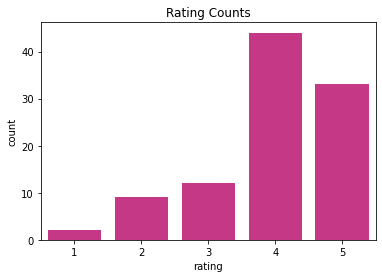

In [39]:
ratingCount = pd.DataFrame(tbc['rating'].value_counts()).reset_index()

ratingCount.columns = ['rating', 'count']

ratingCount.sort_values('rating')

sns.barplot(x=ratingCount['rating'], 
            y=ratingCount['count'], 
            color='#DC2087').set_title('Rating Counts')

plt.savefig('rating_counts.png')
plt.show();

In [40]:
# splits dataframe into three time periods to compare ratings over time

late = tbc[tbc['date'] >= '2016-2']

mid = tbc[(tbc['date'] < '2016-2') &
                (tbc['date'] >= '2015-5')]
                
early = tbc[tbc['date'] < '2015-5']

assert(len(late) + len(mid) + len(early) == len(tbc))

In [41]:
# gets average rating for time periods
earlyAVG = early['rating'].sum()/len(late)
midAVG = mid['rating'].sum()/len(late)
lateAVG = late['rating'].sum()/len(late)

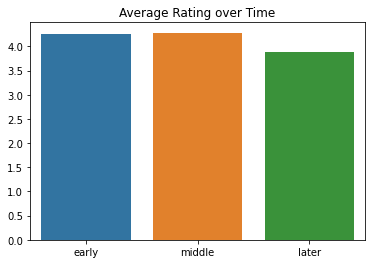

In [42]:
# plots the averages

avgs = [earlyAVG, midAVG, lateAVG]
labels = ['early', 
          'middle', 
          'later']

sns.barplot(x=labels, y=avgs).set_title('Average Rating over Time');
plt.savefig('avg_rating.png')
plt.show();

In [43]:
lateAVG

3.875

In [44]:
# creates dataframes for good and bad ratings
tbcGood = dfGood[dfGood['shop'] == 'Thunderbird Coffee ']
tbcBad = dfBad[dfBad['shop'] == 'Thunderbird Coffee ']

# makes sure the size of the new dataframes add up to the size of the original dataframe
assert len(tbc) == len(tbcGood) + len(tbcBad)

In [45]:
# looks at top 5 words from good reviews using lecture function

good_words = count(tbcGood['counter'])

good_words.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
23,coffee,61,121,1.0,0.030986,0.030986,0.792208
57,good,42,68,2.0,0.017414,0.048399,0.545455
89,place,40,65,3.0,0.016645,0.065045,0.519481
14,latte,28,48,4.0,0.012292,0.077337,0.363636
161,great,31,43,5.0,0.011012,0.088348,0.402597


In [46]:
# looks at top 5 words from bad reviews using lecture function

bad_words = count(tbcBad['counter'])

bad_words.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
15,coffee,20,41,1.0,0.029883,0.029883,0.869565
54,place,9,24,2.0,0.017493,0.047376,0.391304
63,order,10,19,3.0,0.013848,0.061224,0.434783
55,like,8,14,4.0,0.010204,0.071429,0.347826
76,im,8,13,5.0,0.009475,0.080904,0.347826


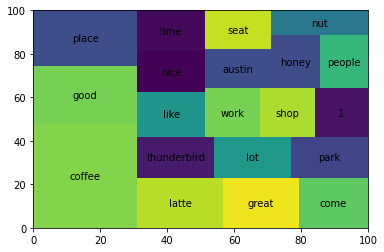

In [47]:
top20good = good_words[good_words['rank'] < 21]

squarify.plot(sizes=top20good['count'], label=top20good['word']);

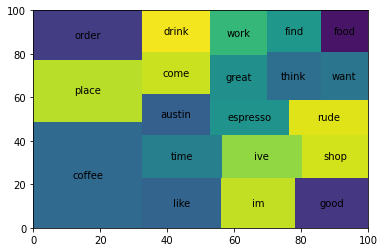

In [48]:
top20bad = bad_words[bad_words['rank'] < 21]

squarify.plot(sizes=top20bad['count'], label=top20bad['word']);

In [49]:
# creates dataframe for seeing difference in word use for good/bad review word useage
badDFtbc = bad_words[['word', 'appears_in_pct']]
badDFtbc.columns = ['word', 'percentage_in_bad']

goodDFtbc = good_words[['word', 'appears_in_pct']]
goodDFtbc.columns = ['word', 'percentage_in_good']

wordPercents_tbc = pd.merge(goodDFtbc, badDFtbc, on='word')

# creates a difference column
wordPercents_tbc['difference'] = wordPercents_tbc['percentage_in_good'] - wordPercents_tbc['percentage_in_bad']

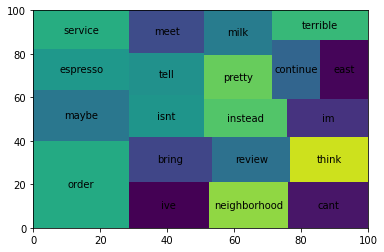

In [50]:
# shows top 20 words used more in bad reviews than good reviews
badPercents = wordPercents_tbc.sort_values('difference').head(20)

squarify.plot(sizes=badPercents['difference'].apply(abs), 
              label=badPercents['word'])

plt.savefig('bad.png')
plt.show()

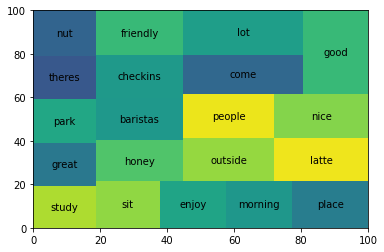

In [51]:
# shows top 10 words used more in bad reviews than good reviews
goodPercents = wordPercents_tbc.sort_values('difference').tail(20)

squarify.plot(sizes=goodPercents['difference'].apply(abs), 
              label=goodPercents['word'])

plt.savefig('good.png')
plt.show()